In [1]:
pip install git+https://github.com/tweepy/tweepy.git

  Cloning https://github.com/tweepy/tweepy.git to /private/var/folders/8f/5jhfz37n2zz6fvsrlsxym1w00000gn/T/pip-req-build-gm1dgnhg
  Created wheel for tweepy: filename=tweepy-4.0.0a0-py2.py3-none-any.whl size=59132 sha256=34c34717c8b6901f46424ba359712787def47e32ed9ba57e4c66741ce4ed1cbf
  Stored in directory: /private/var/folders/8f/5jhfz37n2zz6fvsrlsxym1w00000gn/T/pip-ephem-wheel-cache-zi0kg6pa/wheels/ad/05/51/a78f66d15b87f9c623d2f3afc4401660ac4219e526c787fb8b
Successfully built tweepy
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import requests
import json
import seaborn as sns
import os
import tweepy
import matplotlib.pyplot as plt
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import zipfile
%matplotlib inline

> ## Gathering and Importing Data

In [3]:
# Import the data
df_archive = pd.read_csv('twitter-archive-enhanced.csv')
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
# Extract the data on the neural network image prediction from the image prediction dataset 
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

folder = 'image-predictions'
if not os.path.exists(folder):
    os.makedirs(folder)
    
with open(os.path.join(folder, url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)
    
os.listdir(folder)

df_img_predictions = pd.read_csv(folder + '/image-predictions.tsv', sep='\t')
df_img_predictions.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
952,705066031337840642,https://pbs.twimg.com/media/CcjlzRkW0AMqmWg.jpg,1,Airedale,0.868658,True,Irish_terrier,0.027587,True,otterhound,0.025324,True
1549,792913359805018113,https://pbs.twimg.com/media/CwD-eCLWIAA6v0B.jpg,4,web_site,0.226716,False,lighter,0.081941,False,switch,0.039009,False
899,699788877217865730,https://pbs.twimg.com/media/CbYmRHyWEAASNzm.jpg,1,Border_terrier,0.355060,True,toy_poodle,0.169736,True,Norwegian_elkhound,0.099884,True
1385,766008592277377025,https://pbs.twimg.com/media/CqFouXOXYAAYpzG.jpg,1,Welsh_springer_spaniel,0.728153,True,basset,0.103842,True,Brittany_spaniel,0.062414,True
209,669972011175813120,https://pbs.twimg.com/media/CUw3_QiUEAA8cT9.jpg,1,teddy,0.953071,False,koala,0.007027,False,fur_coat,0.005368,False


In [5]:
df_img_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [6]:
df_img_predictions.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


> Skipping all these below as I could not get permission to access Twitter's API

In [7]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
#consumer_key = 'HIDDEN'
#consumer_secret = 'HIDDEN'
#access_token = 'HIDDEN'
#access_secret = 'HIDDEN'

#auth = OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_secret)

#api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
#tweet_ids = df_archive.tweet_id.values
#len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
#count = 0
#fails_dict = {}
#start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
#with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
 #   for tweet_id in tweet_ids:
  #      count += 1
  #      print(str(count) + ": " + str(tweet_id))
   #     try:
    #        tweet = api.get_status(tweet_id, tweet_mode='extended')
     #       print("Success")
      #      json.dump(tweet._json, outfile)
       #     outfile.write('\n')
        #except tweepy.TweepError as e:
         #   print("Fail")
          #  fails_dict[tweet_id] = e
           # pass
#end = timer()
#print(end - start)
#print(fails_dict)

In [8]:
# Extract the tweet-json.txt file from the zipfile
with open('tweet-json.zip','rb') as f:
    tweets = zipfile.ZipFile(f)
    tweets.extractall()

# Check for the extracted file
tweets.namelist()

['tweet-json copy']

In [9]:
# Read the file into a DataFrame
with open('tweet-json copy', 'r') as f:
    df_tweet_json = pd.read_json(f, lines= True, encoding = 'utf-8')

# check the data
df_tweet_json.sample(10)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
2051,2015-12-01 00:24:48+00:00,671485057807351808,671485057807351808,Meet Penelope. She is a white Macadamias Duode...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 671485051893383168, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,806,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1324,2016-03-05 16:24:01+00:00,706153300320784384,706153300320784384,This is Layla. She's giving you a standing ova...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",NaN,...,1632,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
983,2016-07-02 03:00:36+00:00,749075273010798592,749075273010798592,This is Boomer. He's self-baptizing. Other dog...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",NaN,...,6353,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2343,2015-11-16 01:22:45+00:00,666063827256086533,666063827256086528,This is the happiest dog you will ever see. Ve...,False,"[0, 107]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666063820255862784, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,496,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1878,2015-12-10 17:37:00+00:00,675006312288268288,675006312288268288,Say hello to Mollie. This pic was taken after ...,False,"[0, 134]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 675006303748665346, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,1057,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
810,2016-09-01 02:21:21+00:00,771171053431250945,771171053431250944,RT @dog_rates: This is Frankie. He's wearing b...,False,"[0, 112]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 673320125483892736, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,0.0,0.0,en,{'created_at': 'Sun Dec 06 01:56:44 +0000 2015...,NaN,NaN,NaN
1947,2015-12-07 02:25:23+00:00,673689733134946305,673689733134946304,When you're having a blast and remember tomorr...,False,"[0, 88]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 673689698171228160, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,1855,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2205,2015-11-23 03:09:00+00:00,668627278264475648,668627278264475648,This is Timofy. He's a pilot for Southwest. It...,False,"[0, 144]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 668627275181633536, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,341,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
588,2016-11-17 17:50:33+00:00,799308762079035393,799308762079035392,RT @dog_rates: I WAS SENT THE ACTUAL DOG IN TH...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,True,False,NaN,NaN,en,{'created_at': 'Fri Sep 09 18:31:54 +0000 2016...,NaN,NaN,NaN
530,2016-12-12 00:29:28+00:00,808106460588765185,808106460588765184,Here we have Burke (pupper) and Dexter (doggo)...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 808106447573843970, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,9701,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [10]:
df_tweet_json.columns

Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang', 'retweeted_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status'],
      dtype='object')

In [11]:
# Use the loc function to select columns of interest.
df_tweet_json = df_tweet_json.loc[:, ['id', 'retweet_count', 'favorite_count']]

df_tweet_json.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


## Assessing the 3 dataframes for analysis

In [12]:
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [13]:
df_img_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [14]:
df_tweet_json.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [15]:
df_tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [16]:
df_img_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [17]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [18]:
# Get the count of clients were used by users to tweet
df_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [19]:
df_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [20]:
df_img_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [21]:
df_tweet_json.describe()

,id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [22]:
# Get the dimensions of the 3 dataframes
df_tweet_json.shape[0], df_img_predictions.shape[0], df_archive.shape[0]

(2354, 2075, 2356)

In [23]:
# From the 3 datasets, duplicate the columns
all_data_columns = pd.Series(list(df_archive) + list(df_img_predictions) + list(df_tweet_json))
all_data_columns[all_data_columns.duplicated()]

17    tweet_id
dtype: object

In [24]:
df_tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [25]:
df_tweet_json.isnull().sum()

id                0
retweet_count     0
favorite_count    0
dtype: int64

## Notes & Issues

> + df_tweet_json contains the retweet and favourite counts.
> + df_img_predictions contains the neural network results trying to identify the dog breeds.
> + df_archive contains information on the tweets text, tweet_id and others.

> Tidiness
> + There are 3 separate tables.
> + Dog stages are in multiple columns. Put this into a single column.
> + All the retweets and favorites are in the df_archive dataframe

> Validity
> + df_archive - tweet_id is int, timestamp is str, dog stages are str, ellipsis used to cut off some text
> + df_img_predictions - tweet_id is int

> Cosistency
> + The numerators and denominators are inconsistent

## Cleaning

In [26]:
# Create copies of the dataframes

clean_tweet_json = df_tweet_json.copy()
clean_img_predictions = df_img_predictions.copy()
clean_archive = df_archive.copy()

In [27]:
clean_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [28]:
clean_tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [29]:
# Rename id to tweet_id
clean_tweet_json.rename({"id":"tweet_id"}, axis=1, inplace=True)
clean_tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [30]:
# Convert tweet_id in clean_archive to str
clean_archive.tweet_id = clean_archive.tweet_id.astype(str)
clean_img_predictions.tweet_id = clean_img_predictions.tweet_id.astype(str)
clean_tweet_json.tweet_id = clean_tweet_json.tweet_id.astype(str)

In [31]:
# Merge the ids across the dataframes
clean_archive = pd.merge(clean_archive, clean_img_predictions,
                        how='inner', on='tweet_id')
clean_archive = pd.merge(clean_archive, clean_tweet_json,
                        how='inner', on='tweet_id')

In [32]:
#Get a sense of the dataframe
clean_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8853,39467
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964,42908
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774,41048


In [33]:
clean_archive.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'retweet_count', 'favorite_count'],
      dtype='object')

In [34]:
#Confirm if null values exists in the favorite count column
clean_archive[clean_archive.favorite_count.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count


In [35]:
# Melt all the various dog stages into a single column
clean_archive = pd.melt(clean_archive,
                        id_vars=['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
                                 'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
                                 'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
                                 'rating_denominator', 'name','jpg_url', 'img_num', 'p1', 'p1_conf',
                                 'p1_dog', 'p2', 'p2_conf','p2_dog', 'p3', 'p3_conf', 'p3_dog',
                                 'retweet_count', 'favorite_count'],
                        value_name='dog_stage')
clean_archive = clean_archive.drop('variable', axis=1)

In [36]:
sum(clean_archive.dog_stage == 'None')

7959

In [37]:
#Get a count of the dog stages
clean_archive.dog_stage.value_counts()

None       7959
pupper      221
doggo        80
puppo        24
floofer       8
Name: dog_stage, dtype: int64

In [38]:
# Convert the following float variables to object
clean_archive.in_reply_to_status_id = clean_archive.in_reply_to_status_id.astype(str)
clean_archive.in_reply_to_user_id = clean_archive.in_reply_to_user_id.astype(str)
clean_archive.retweeted_status_id = clean_archive.retweeted_status_id.astype(str)
clean_archive.retweeted_status_user_id = clean_archive.retweeted_status_user_id.astype(str)

In [39]:
clean_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8292 entries, 0 to 8291
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    8292 non-null   object 
 1   in_reply_to_status_id       8292 non-null   object 
 2   in_reply_to_user_id         8292 non-null   object 
 3   timestamp                   8292 non-null   object 
 4   source                      8292 non-null   object 
 5   text                        8292 non-null   object 
 6   retweeted_status_id         8292 non-null   object 
 7   retweeted_status_user_id    8292 non-null   object 
 8   retweeted_status_timestamp  316 non-null    object 
 9   expanded_urls               8292 non-null   object 
 10  rating_numerator            8292 non-null   int64  
 11  rating_denominator          8292 non-null   int64  
 12  name                        8292 non-null   object 
 13  jpg_url                     8292 

In [40]:
# Convert the following columns to datetime
clean_archive.timestamp = pd.to_datetime(clean_archive.timestamp)
clean_archive.retweeted_status_timestamp = pd.to_datetime(clean_archive.retweeted_status_timestamp)

In [41]:
# Convert dog_stage to categorical datatype
clean_archive.dog_stage = clean_archive.dog_stage.astype('category')

In [42]:
# Keep rows with dog stage and one of 3 duplicates with 'None'
duplicated_df_1 = clean_archive.drop_duplicates(subset=['tweet_id', 'dog_stage']) 
duplicated_df_1 = clean_archive.drop_duplicates()

duplicated_pos = clean_archive.duplicated(subset='tweet_id', keep = False)
duplicated_df_2 = clean_archive[duplicated_pos]
duplicated_df_2 = duplicated_df_2[duplicated_df_2.dog_stage != 'None']

# Merge the dataframes by using the append function
duplicated_df_1 = duplicated_df_1.drop_duplicates(subset = 'tweet_id', keep = False)
duplicated_df_merged = duplicated_df_1.append(duplicated_df_2)

In [43]:
duplicated_df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2086 entries, 0 to 7108
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2086 non-null   object             
 1   in_reply_to_status_id       2086 non-null   object             
 2   in_reply_to_user_id         2086 non-null   object             
 3   timestamp                   2086 non-null   datetime64[ns, UTC]
 4   source                      2086 non-null   object             
 5   text                        2086 non-null   object             
 6   retweeted_status_id         2086 non-null   object             
 7   retweeted_status_user_id    2086 non-null   object             
 8   retweeted_status_timestamp  81 non-null     datetime64[ns, UTC]
 9   expanded_urls               2086 non-null   object             
 10  rating_numerator            2086 non-null   int64           

In [44]:
# Get the median for the retweets and favorites columns
median_retweet_count = np.median(clean_archive.retweet_count)
median_favorite_count = np.median(clean_archive.favorite_count)
median_retweet_count, median_favorite_count

(1408.0, 3864.0)

In [45]:
# Fill the NaNs in the retweets and favorites columns with the median
clean_archive.retweet_count = clean_archive.retweet_count.fillna(median_retweet_count).astype('int64')
clean_archive.favorite_count = clean_archive.favorite_count.fillna(median_favorite_count).astype('int64')

In [46]:
#Assign new dataframe to clean archive
clean_archive = duplicated_df_merged
clean_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2086 entries, 0 to 7108
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2086 non-null   object             
 1   in_reply_to_status_id       2086 non-null   object             
 2   in_reply_to_user_id         2086 non-null   object             
 3   timestamp                   2086 non-null   datetime64[ns, UTC]
 4   source                      2086 non-null   object             
 5   text                        2086 non-null   object             
 6   retweeted_status_id         2086 non-null   object             
 7   retweeted_status_user_id    2086 non-null   object             
 8   retweeted_status_timestamp  81 non-null     datetime64[ns, UTC]
 9   expanded_urls               2086 non-null   object             
 10  rating_numerator            2086 non-null   int64           

In [47]:
# Perform a random search to find names that don't represent a dog breed/stage
clean_archive.name.value_counts()[:60]

None        584
a            55
Charlie      11
Lucy         10
Penny        10
Oliver       10
Cooper       10
Tucker       10
Winston       8
Bo            8
Sadie         8
Lola          8
Daisy         7
Toby          7
an            7
the           7
Bella         6
Koda          6
Bailey        6
just          6
Jax           6
Dave          6
Scout         6
Milo          6
Rusty         6
Stanley       6
Buddy         5
Louis         5
Oscar         5
Leo           5
Maggie        5
Alfie         5
Larry         5
Chester       5
Dexter        4
Bentley       4
Duke          4
Cassie        4
Ruby          4
Derek         4
Oakley        4
one           4
Bear          4
George        4
Gus           4
Walter        4
Jack          4
Winnie        4
Sophie        4
Brody         4
Chip          4
Sunny         4
Clarence      4
Jerry         4
Phil          4
Bruce         4
very          4
Reggie        4
Archie        4
Gary          4
Name: name, dtype: int64

In [48]:
clean_archive.name.value_counts()[60:100]

Loki         4
Scooter      4
Clark        4
Finn         4
Calvin       3
Boomer       3
Sampson      3
Zoey         3
Jeffrey      3
Ellie        3
Waffles      3
Maximus      3
Samson       3
Zeke         3
Kyle         3
Frankie      3
Sammy        3
Jimothy      3
Steven       3
Paisley      3
Louie        3
Shadow       3
Hank         3
Malcolm      3
Peaches      3
Wilson       3
Reese        3
Wyatt        3
Max          3
Gerald       3
Mia          3
Earl         3
Beau         3
Gizmo        3
Wallace      3
quite        3
Riley        3
Sebastian    3
Olive        3
Otis         3
Name: name, dtype: int64

In [49]:
clean_archive.name.value_counts()[100:160]

Vincent      3
Colby        3
Lily         3
Nala         3
Rosie        3
Moose        3
Benji        2
Rubio        2
Herm         2
Chompsky     2
Crystal      2
Nelly        2
Penelope     2
Hammond      2
Albert       2
Paull        2
Roosevelt    2
Smokey       2
Indie        2
Linda        2
Herald       2
Reginald     2
Hunter       2
Titan        2
Jesse        2
Terry        2
Lilly        2
Gromit       2
Kreg         2
Astrid       2
Oliviér      2
Abby         2
Lorenzo      2
Kilo         2
Wally        2
Chelsea      2
Phred        2
Luca         2
Piper        2
Rory         2
Sandy        2
Dido         2
Eli          2
Juno         2
Finley       2
Bubbles      2
Yogi         2
Sam          2
Harold       2
CeCe         2
Butter       2
Moreton      2
Stubert      2
Jackson      2
Flávio       2
Neptune      2
Betty        2
Cody         2
Watson       2
Klevin       2
Name: name, dtype: int64

In [50]:
clean_archive.name.value_counts()[160:210]

Percy       2
Fiona       2
Arnie       2
Elliot      2
Solomon     2
Rocky       2
Doc         2
Maxaroni    2
Pippa       2
Rizzy       2
Jiminy      2
Romeo       2
Frank       2
Bob         2
Ava         2
Davey       2
Ollie       2
Misty       2
Kreggory    2
Ash         2
Atlas       2
Aspen       2
Django      2
Phineas     2
Griffin     2
Lennon      2
Lincoln     2
Franklin    2
Sugar       2
Kenneth     2
Brad        2
Mister      2
Bell        2
Churlie     2
Theodore    2
Chuckles    2
Trooper     2
Dash        2
Jimison     2
Belle       2
Tyr         2
Carl        2
Patrick     2
Raymond     2
Benedict    2
Dakota      2
Lenny       2
Marley      2
Coops       2
Hobbes      2
Name: name, dtype: int64

In [51]:
clean_archive.name.value_counts()[210:270]

Bernie       2
Kenny        2
Bisquick     2
Remington    2
Moe          2
Baxter       2
Doug         2
Panda        2
Ken          2
Keith        2
Ted          2
Hercules     2
Atticus      2
Pickles      2
Charles      2
Cash         2
Kevin        2
Albus        2
Kirby        2
Sarge        2
getting      2
Bones        2
Sansa        2
Rufus        2
Opal         2
Klein        2
Luna         2
Harper       2
Cali         2
Calbert      2
Lou          2
Pinot        2
Alice        2
Coco         2
Cupcake      2
Stephan      2
Chipson      2
Odie         2
Thumas       2
Gabe         2
Jeph         2
Chet         2
Curtis       2
Olivia       2
Happy        2
Axel         2
Carper       1
Willy        1
Crumpet      1
Damon        1
Eve          1
Tripp        1
Wesley       1
Keurig       1
Gordon       1
Trigger      1
Scott        1
Tater        1
Tino         1
Corey        1
Name: name, dtype: int64

In [52]:
clean_archive.name.value_counts()[270:330]

Tommy         1
Duchess       1
Chaz          1
Ulysses       1
Coopson       1
Mingus        1
Miley         1
River         1
Burt          1
Dietrich      1
Longfellow    1
Cora          1
Carly         1
Karll         1
Marlee        1
Ron           1
Freddery      1
Claude        1
Akumi         1
Steve         1
Clybe         1
Skye          1
Terrenth      1
Dex           1
Pumpkin       1
Swagger       1
Fynn          1
Jimbo         1
Geno          1
Pupcasso      1
Tanner        1
Mike          1
Malikai       1
Gòrdón        1
Mojo          1
Sojourner     1
Vinnie        1
Taco          1
Jessifer      1
Rolf          1
Chubbs        1
Antony        1
Marvin        1
Deacon        1
Loomis        1
Kyro          1
Rodney        1
Mason         1
Bode          1
Nollie        1
Cilantro      1
Brudge        1
Pancake       1
Terrance      1
Donny         1
Tom           1
Joshwa        1
Juckson       1
Iroh          1
Anthony       1
Name: name, dtype: int64

In [53]:
clean_archive.name.value_counts()[330:390] 

Glacier     1
Alf         1
Angel       1
Tonks       1
Arya        1
not         1
Siba        1
Pluto       1
Bilbo       1
Jazz        1
Timofy      1
DonDon      1
BeBe        1
Leonard     1
Mabel       1
Jed         1
Carter      1
Olaf        1
Bowie       1
Quinn       1
Danny       1
Buddah      1
Brownie     1
Brandy      1
Georgie     1
Howie       1
Emmie       1
Lassie      1
Moofasa     1
Hurley      1
Tassy       1
Snickers    1
Reptar      1
Ralphie     1
Aja         1
Cal         1
Crouton     1
Maya        1
Kramer      1
Ralf        1
Godi        1
light       1
Fillup      1
Cermet      1
Jo          1
Finnegus    1
Herb        1
Mosby       1
Zoe         1
Trip        1
Rupert      1
Dotsy       1
Blitz       1
Gilbert     1
Suki        1
Jarod       1
Chef        1
Jameson     1
Bradley     1
Wafer       1
Name: name, dtype: int64

In [54]:
clean_archive.name.value_counts()[390:420]

Venti       1
Tobi        1
Griswold    1
Bayley      1
Boots       1
Aubie       1
Richie      1
Chevy       1
Halo        1
Todo        1
Creg        1
Frönq       1
Kawhi       1
Bubba       1
Kirk        1
Jerome      1
Poppy       1
Darla       1
Grizzie     1
Lilli       1
Fizz        1
Peanut      1
Pavlov      1
Mookie      1
Mimosa      1
Baron       1
Kobe        1
Ralph       1
O           1
Gustav      1
Name: name, dtype: int64

In [55]:
# Replace the following strings in the name column with 'None'
not_names = ['a', 'an', 'getting', 'unacceptable ', 'the', 'space', 'officially', 'just', 'one', 'very', 'quite', 'not', 'actually', 'mad', 'space', 'infuriating', 'all', 'officially', '0', 'old', 'life',
             'unacceptable', 'my', 'incredibly', 'by', 'his', 'such']

for name in clean_archive.name:
    if name in not_names:
        clean_archive.name[clean_archive.name == name] = 'None'

<ipython-input-55-7928937d892e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_archive.name[clean_archive.name == name] = 'None'


In [56]:
# Get the value of counts for the dog names
clean_archive.name.value_counts()[:10]

None       684
Charlie     11
Penny       10
Lucy        10
Tucker      10
Oliver      10
Cooper      10
Sadie        8
Bo           8
Lola         8
Name: name, dtype: int64

In [57]:
# Create new columns for month and day. Extract the information from the timestamp column
clean_archive['month'] = clean_archive.timestamp.apply(lambda x: x.month_name())
clean_archive['day'] = clean_archive.timestamp.apply(lambda x: x.day_name())

In [58]:
clean_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2086 entries, 0 to 7108
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2086 non-null   object             
 1   in_reply_to_status_id       2086 non-null   object             
 2   in_reply_to_user_id         2086 non-null   object             
 3   timestamp                   2086 non-null   datetime64[ns, UTC]
 4   source                      2086 non-null   object             
 5   text                        2086 non-null   object             
 6   retweeted_status_id         2086 non-null   object             
 7   retweeted_status_user_id    2086 non-null   object             
 8   retweeted_status_timestamp  81 non-null     datetime64[ns, UTC]
 9   expanded_urls               2086 non-null   object             
 10  rating_numerator            2086 non-null   int64           

In [59]:
# Get the count of months in the dataframe
clean_archive.month.value_counts()

December     429
November     369
January      247
February     179
March        174
July         146
June         128
May          104
April        100
October       72
September     72
August        66
Name: month, dtype: int64

In [60]:
# Get the value counts of days in the dataframe
clean_archive.day.value_counts()

Monday       342
Wednesday    314
Tuesday      313
Friday       297
Thursday     292
Saturday     265
Sunday       263
Name: day, dtype: int64

In [61]:
#Store our dataframe to a csv file
clean_archive.to_csv('twitter_archive_cleaned.csv', encoding='utf-8', index=False)

## Analysis & Visualization

In [62]:
# List the columns in the dataframe
clean_archive.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'jpg_url', 'img_num', 'p1', 'p1_conf',
       'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog',
       'retweet_count', 'favorite_count', 'dog_stage', 'month', 'day'],
      dtype='object')

## 1. Which day records the highest number of dog posts?

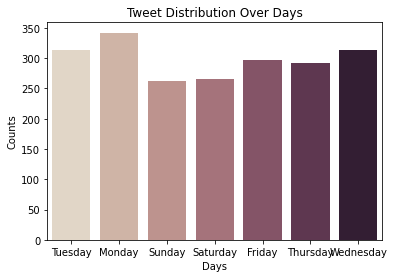

In [63]:
# Use countplot to plot the distribution of tweets by weekdays
sns.countplot(data = clean_archive, x = 'day',
              palette="ch:.25").set_title('Tweet Distribution Over Days')
plt.xlabel('Days')
plt.ylabel('Counts')
plt.show();

> Mondays take the lead fro week days where the most tweets are made. 

## 2. What is the distribution for the retweet and favorite count?

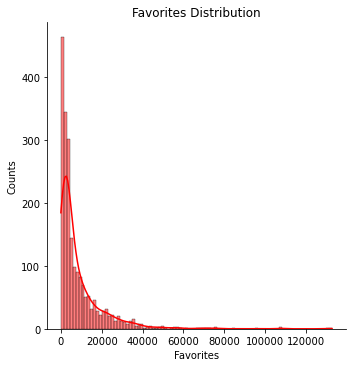

In [64]:
#Plot favaorite distribution
sns.displot(clean_archive.favorite_count, color = 'red', label = 'Favorite Count', kde=True);
plt.title('Favorites Distribution')
plt.xlabel('Favorites')
plt.ylabel('Counts')
plt.show();

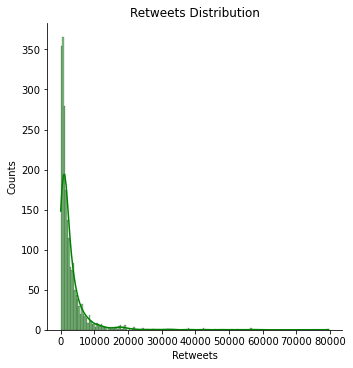

In [65]:
# Plot retweet distribution
sns.displot(clean_archive.retweet_count, color = 'green', label = 'Retweet Count', kde=True)
plt.title('Retweets Distribution')
plt.xlabel('Retweets')
plt.ylabel('Counts')
plt.show();

In [66]:
#Log transform the variable - favorite count and retweet count to get a normal distribution
favorite_log = clean_archive.favorite_count[clean_archive.favorite_count <= 0] = 1
retweet_log = clean_archive.retweet_count[clean_archive.retweet_count <= 0] = 1

<ipython-input-66-797b0f47462b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  favorite_log = clean_archive.favorite_count[clean_archive.favorite_count <= 0] = 1
<ipython-input-66-797b0f47462b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retweet_log = clean_archive.retweet_count[clean_archive.retweet_count <= 0] = 1


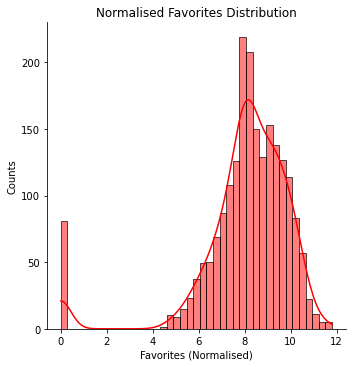

In [67]:
# Plot a normalised favorite count distribution
sns.displot(clean_archive.favorite_count.apply(np.log), color = 'red', label = 'Favorite Count', kde=True)
plt.title('Normalised Favorites Distribution')
plt.xlabel('Favorites (Normalised)')
plt.ylabel('Counts')
plt.show();

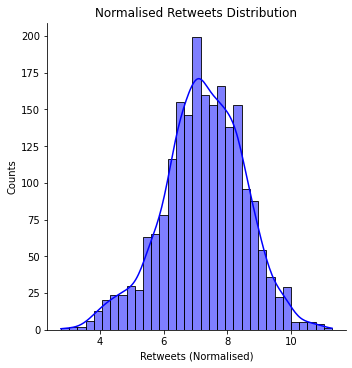

In [68]:
#Plot a normalised retweet count distribution
sns.displot(clean_archive.retweet_count.apply(np.log), color = 'blue',
            label = 'Favorite Count', kde=True)
plt.xlabel('Retweets (Normalised)')
plt.ylabel('Counts')
plt.title('Normalised Retweets Distribution')
plt.show();

> This normalised distribution shows similar relationships between the favorite and retweet counts

## 3. What is the correlation between the favorite and retweet counts?

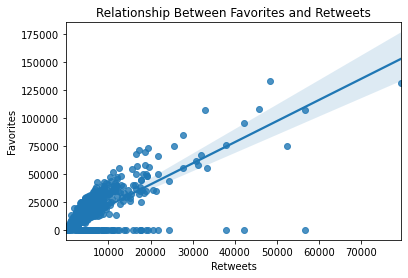

In [69]:
#Plot a regression plot to visualise the relationship between retweet count and favorite count
g = sns.regplot(x=clean_archive.retweet_count, y=clean_archive.favorite_count)
plt.title("Relationship Between Favorites and Retweets")
plt.xlabel('Retweets')
plt.ylabel('Favorites');

> This shows that there is a good correlation between favorites and retweets.

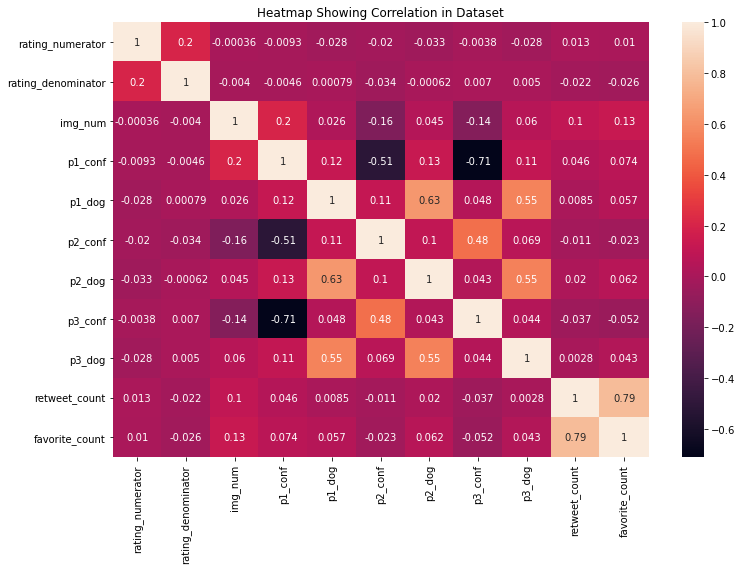

In [70]:
# Create a heatmap showing the correlation in the dataset
corr = clean_archive.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True).set_title('Heatmap Showing Correlation in Dataset');

> We see the strong correlation between retweets and favorites. This is because as a tweet gets more retweets, the number of like/favorites also goes up.

## 4. Which of the breeds is the most common?

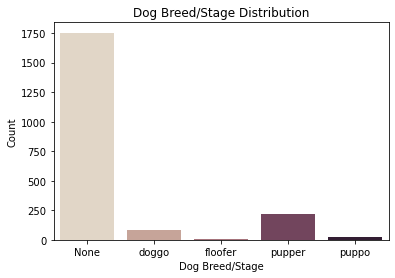

In [71]:
# Use countplot to plot the distribution of tweets by weekdays
sns.countplot(data = clean_archive, x = 'dog_stage',
              palette="ch:.25").set_title('Dog Breed/Stage Distribution')
plt.xlabel('Dog Breed/Stage')
plt.ylabel('Count')
plt.show();

> If we take out 'None', we see that the most popular breed/stage is Pupper.

## 5. What month of the year sees more action with respect to dog posts?

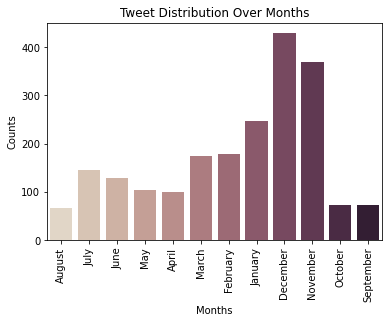

In [72]:
# Use countplot to plot the distribution of tweets by weekdays
sns.countplot(data = clean_archive, x = 'month',
              palette="ch:.25").set_title('Tweet Distribution Over Months')
plt.xlabel('Months')
plt.ylabel('Counts')
plt.xticks(rotation=90)
plt.show();

> November, December and January are the busiest. This is not surprising as they correspond with the holiday period.